In [1]:
import pickle

# Unpickle the file
with open(r'/content/images.p', "rb") as f:
  images = pickle.load(f)

with open(r'/content/labels.p', "rb") as f:
  labels = pickle.load(f)

In [2]:
print(images.shape)
print(labels.shape)

(762, 100, 100)
(762,)


In [3]:
set(labels)

{'Akanksha',
 'Darshan Bhaiya',
 'Debashree Mam',
 'Devesh Bhaiya',
 'Jay',
 'Pragyan Didi',
 'Ritu Mam',
 'Soham',
 'Tanuj'}

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [5]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [6]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8])

array(['Akanksha', 'Darshan Bhaiya', 'Debashree Mam', 'Devesh Bhaiya',
       'Jay', 'Pragyan Didi', 'Ritu Mam', 'Soham', 'Tanuj'], dtype='<U14')

In [7]:
import numpy as np

In [8]:
n_persons = len(set(labels))
print("Number of persons: ", n_persons)
label_mapping = le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i, "-->", label_mapping[i])

Number of persons:  9
0 --> Akanksha
1 --> Darshan Bhaiya
2 --> Debashree Mam
3 --> Devesh Bhaiya
4 --> Jay
5 --> Pragyan Didi
6 --> Ritu Mam
7 --> Soham
8 --> Tanuj


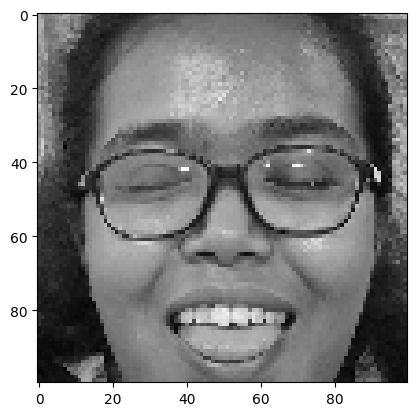

In [9]:
import matplotlib.pyplot as plt

plt.imshow(images[200], cmap=plt.get_cmap("gray"))
plt.show()

In [10]:
import cv2

In [11]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100, 100, 1)
  img = img/255
  return img

In [12]:
images = np.array(list(map(preprocessing, images)))
print("Shape of Input: ", images.shape)

Shape of Input:  (762, 100, 100, 1)


In [13]:
print(images)

[[[[0.96862745]
   [0.97254902]
   [0.97254902]
   ...
   [0.98823529]
   [0.98823529]
   [0.98823529]]

  [[0.97254902]
   [0.98039216]
   [0.97254902]
   ...
   [0.98431373]
   [0.98823529]
   [0.98823529]]

  [[0.97647059]
   [0.98431373]
   [0.97647059]
   ...
   [0.99215686]
   [0.98823529]
   [0.98823529]]

  ...

  [[0.18039216]
   [0.0745098 ]
   [0.05098039]
   ...
   [0.0745098 ]
   [0.04313725]
   [0.05882353]]

  [[0.12941176]
   [0.0745098 ]
   [0.06666667]
   ...
   [0.05098039]
   [0.05098039]
   [0.05098039]]

  [[0.12941176]
   [0.06666667]
   [0.05490196]
   ...
   [0.12941176]
   [0.01960784]
   [0.0745098 ]]]


 [[[0.97647059]
   [0.97647059]
   [0.97254902]
   ...
   [0.99215686]
   [0.99607843]
   [1.        ]]

  [[0.98039216]
   [0.98039216]
   [0.98039216]
   ...
   [0.99215686]
   [0.99215686]
   [0.99607843]]

  [[0.98431373]
   [0.97647059]
   [0.97647059]
   ...
   [0.99215686]
   [0.99607843]
   [0.99215686]]

  ...

  [[0.16862745]
   [0.08235294]
   [0.0

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
labels = to_categorical(labels)
print(labels)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [16]:
categories = labels.shape[1]
print(categories)

9


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# import convolution layer
from tensorflow.keras.layers import Conv2D

# import pooling layer
from tensorflow.keras.layers import MaxPooling2D

# import faltten layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [18]:
def modified_model():

  model=Sequential()

  model.add(Conv2D(64,(3,3),input_shape=(100,100,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())

  model.add(Dense(800,activation='relu'))

  model.add(Dense(700,activation='relu'))

  model.add(Dense(600,activation='relu'))

  model.add(Dense(500,activation='relu'))

  model.add(Dense(9,activation='softmax'))
  model.compile(Adam(lr=0.002),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [19]:
model=modified_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [20]:
h=model.fit(images,labels,batch_size=80,epochs=40,validation_data=(images,labels),shuffle='True',verbose=1)

Epoch 1/40
10/10 [==============================] - 14s 115ms/step - loss: 2.1162 - accuracy: 0.1811 - val_loss: 1.8008 - val_accuracy: 0.4213
Epoch 2/40
10/10 [==============================] - 0s 45ms/step - loss: 1.1711 - accuracy: 0.6444 - val_loss: 0.2931 - val_accuracy: 0.9383
Epoch 3/40
10/10 [==============================] - 0s 44ms/step - loss: 0.1898 - accuracy: 0.9554 - val_loss: 0.0731 - val_accuracy: 0.9948
Epoch 4/40
10/10 [==============================] - 0s 50ms/step - loss: 0.0738 - accuracy: 0.9895 - val_loss: 0.0408 - val_accuracy: 0.9948
Epoch 5/40
10/10 [==============================] - 0s 44ms/step - loss: 0.0239 - accuracy: 0.9961 - val_loss: 0.0222 - val_accuracy: 0.9974
Epoch 6/40
10/10 [==============================] - 0s 50ms/step - loss: 0.0140 - accuracy: 0.9974 - val_loss: 0.0042 - val_accuracy: 0.9974
Epoch 7/40
10/10 [==============================] - 0s 44ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 4.0771e-04 - val_accuracy: 1.0000
Epoch 8

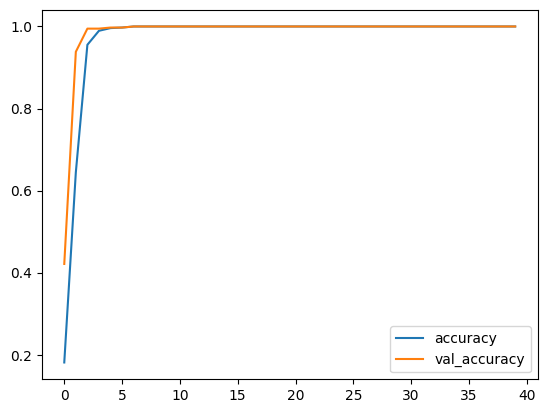

In [21]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

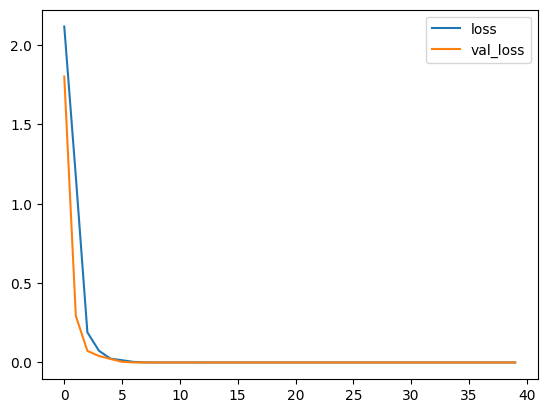

In [22]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [23]:
from tensorflow.keras.models import Model

In [24]:
layer0 = Model(model.layers[0].input, model.layers[0].output)
features = layer0.predict(images[200].reshape(1,100,100,1))

1/1 [==============================] - 0s 93ms/step


In [25]:
features.shape

(1, 98, 98, 64)

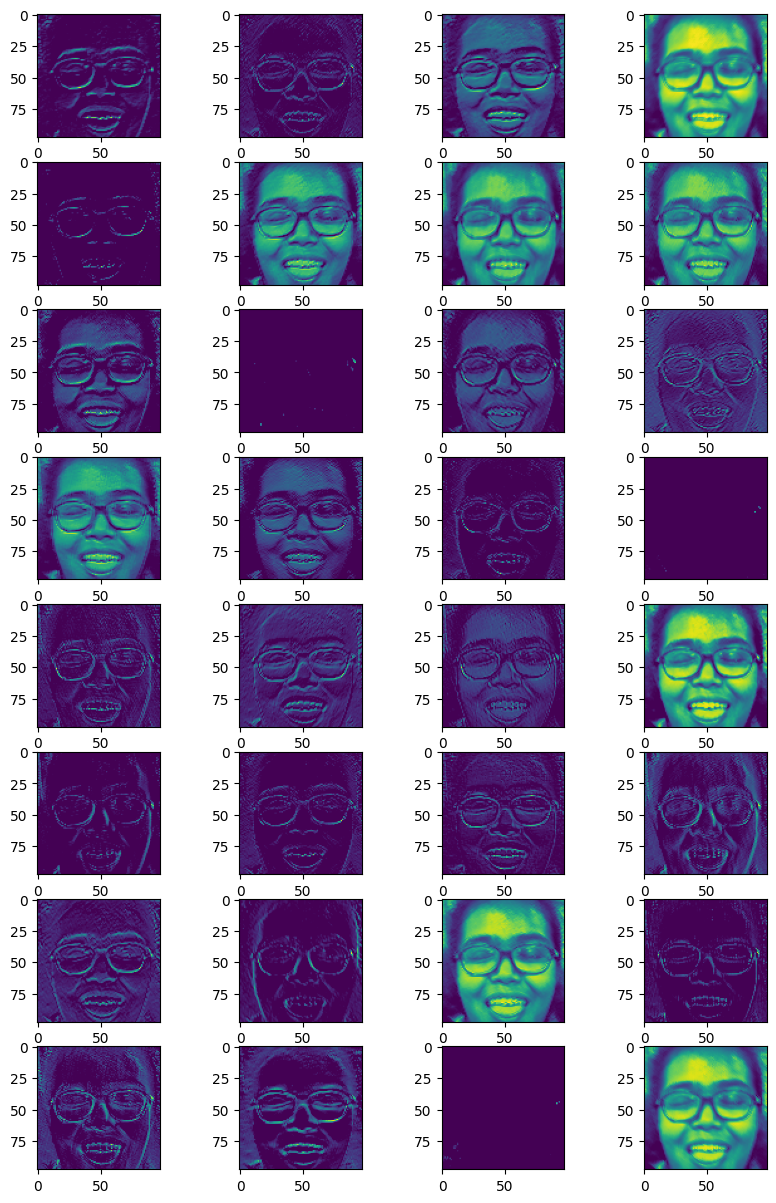

In [26]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8, 4, i+1)
  plt.imshow(features[0,:,:,i])

In [27]:
from google.colab import files
upload=files.upload()

Saving Jay_57.jpg to Jay_57.jpg


In [28]:
d=list(upload.keys())[0]

[255 216 255 ... 127 255 217]


<ipython-input-29-6cc6288e281e>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


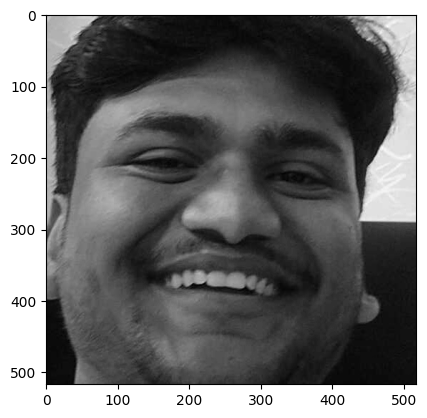

In [29]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [30]:
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)



In [31]:
img=img.reshape(1,100,100,1)
print(model.predict(img))

1/1 [==============================] - 0s 193ms/step
[[2.2437720e-16 3.7490157e-11 4.5263662e-20 3.1845921e-17 1.0000000e+00
  8.7720282e-11 4.2830335e-24 6.3165596e-21 3.8909754e-11]]


In [32]:
prediction=model.predict(img)

1/1 [==============================] - 0s 20ms/step


In [33]:
p=np.argmax(prediction,axis=1)
p

array([4])

In [34]:
model.save("final_model.h5")